In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [ ]:
import sqlite3
import getpass

# Função para conectar ao banco de dados
def conectar_db():
    return sqlite3.connect("usuarios.db")

# Função para criar a tabela de usuários (se ainda não existir)
def criar_tabela():
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS usuarios (
                        usuario TEXT PRIMARY KEY, 
                        senha TEXT)''')
    conn.commit()
    conn.close()

# Função para verificar se o usuário já existe
def usuario_existe(usuario):
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM usuarios WHERE usuario = ?", (usuario,))
    resultado = cursor.fetchone()
    conn.close()
    return resultado is not None

# Função para cadastrar um novo usuário
def cadastrar_usuario():
    print("Bem-vindo ao cadastro de usuários!")
    usuario = input("Digite o nome de usuário desejado: ")
    
    if usuario_existe(usuario):
        print("Usuário já existe. Tente um nome diferente.")
        return False
    
    senha = getpass.getpass("Digite a senha: ")
    senha_confirmada = getpass.getpass("Confirme a senha: ")
    
    if senha != senha_confirmada:
        print("As senhas não coincidem. Tente novamente.")
        return False
    
    # Inserir o novo usuário no banco de dados
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute("INSERT INTO usuarios (usuario, senha) VALUES (?, ?)", (usuario, senha))
    conn.commit()
    conn.close()
    
    print("Cadastro bem-sucedido! Agora você pode fazer login.")
    return True

# Função para verificar as credenciais de login
def verificar_login(usuario, senha):
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM usuarios WHERE usuario = ? AND senha = ?", (usuario, senha))
    resultado = cursor.fetchone()
    conn.close()
    return resultado is not None

# Função de login
def login():
    print("Bem-vindo ao sistema de login!")
    usuario = input("Digite o nome de usuário: ")
    senha = getpass.getpass("Digite a senha: ")
    
    if verificar_login(usuario, senha):
        print("Login bem-sucedido!")
        return True
    else:
        print("Nome de usuário ou senha incorretos. Tente novamente.")
        return False

# Exemplo de uso do sistema de cadastro e login
def menu():
    while True:
        print("Escolha uma opção:")
        print("1 - Fazer login")
        print("2 - Cadastrar novo usuário")
        opcao = input("Digite o número da opção desejada: ").strip()  # Garantir que não haja espaços extras
        
        if opcao == '1':
            while not login():
                pass
        elif opcao == '2':
            while not cadastrar_usuario():
                pass
        else:
            print("Opção inválida. Tente novamente.")

# Criar a tabela de usuários, se necessário
criar_tabela()

# Executar o menu
menu()


Escolha uma opção:
1 - Fazer login
2 - Cadastrar novo usuário
Opção inválida. Tente novamente.
Escolha uma opção:
1 - Fazer login
2 - Cadastrar novo usuário
Bem-vindo ao cadastro de usuários!
Cadastro bem-sucedido! Agora você pode fazer login.
Escolha uma opção:
1 - Fazer login
2 - Cadastrar novo usuário
Opção inválida. Tente novamente.
Escolha uma opção:
1 - Fazer login
2 - Cadastrar novo usuário
Bem-vindo ao sistema de login!
Nome de usuário ou senha incorretos. Tente novamente.
Bem-vindo ao sistema de login!


In [3]:
# Gerar dataset fictício mais avançado
np.random.seed(42)

n = 1000  # Número de amostras
meses = np.random.choice(range(1, 13), n)
feriados = np.random.choice([0, 1], n, p=[0.85, 0.15])  # 15% de feriados
estacoes = ["Verão", "Outono", "Inverno", "Primavera"]
estacao = [estacoes[(mes - 1) // 3] for mes in meses]

# Gerar dados realistas
data = {
    'mes': meses,
    'feriado': feriados,
    'temperatura': [np.random.uniform(25, 35) if est == "Verão" else np.random.uniform(10, 25) for est in estacao],
    'umidade': np.random.uniform(30, 90, n),
    'habitantes': np.random.randint(1, 6, n),
    'potencia': np.random.uniform(100, 500, n),
    'consumo_energia': [np.random.uniform(150, 300) if est == "Verão" else np.random.uniform(50, 150) for est in estacao],
    'estacao': estacao
}

df = pd.DataFrame(data)
df['estacao'] = df['estacao'].map({'Verão': 1, 'Outono': 2, 'Inverno': 3, 'Primavera': 4})
df.to_csv('dados_consumo_avancado.csv', index=False)
print("Dataset criado e salvo como 'dados_consumo_avancado.csv'.")


Dataset criado e salvo como 'dados_consumo_avancado.csv'.


In [ ]:
# Separar variáveis independentes (X) e dependente (y)
X = data[['mes', 'feriado', 'temperatura', 'umidade', 'habitantes', 'potencia']]
y = data['consumo_energia']

# Dividir dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


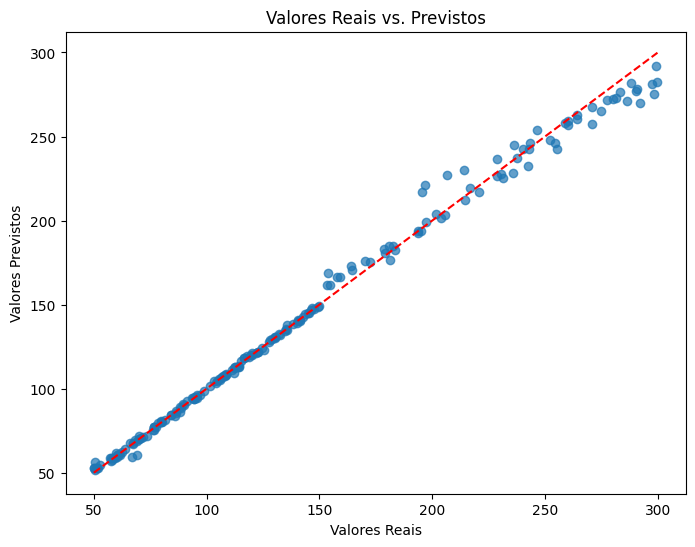

In [21]:
# Visualizar resultados reais vs. previstos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Valores Reais vs. Previstos")
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.show()


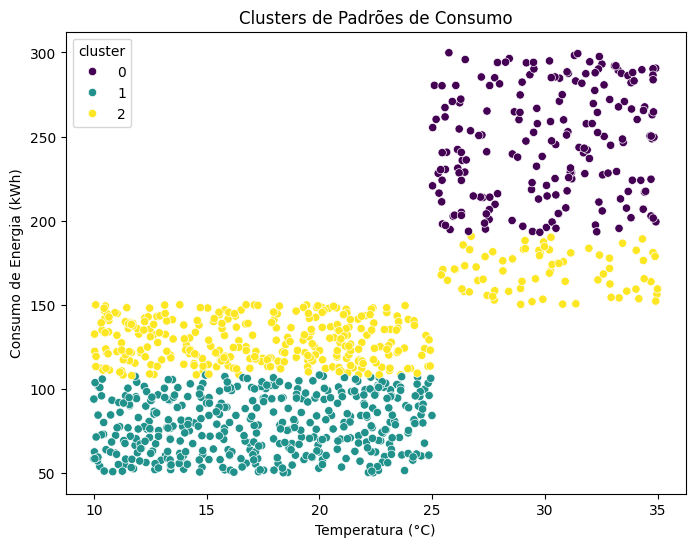

In [16]:
# Clusterização com K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(data[['temperatura', 'umidade', 'consumo_energia']])

# Visualizar clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperatura', y='consumo_energia', hue='cluster', data=data, palette='viridis')
plt.title("Clusters de Padrões de Consumo")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Consumo de Energia (kWh)")
plt.show()


In [5]:
def quiz_educativo():
    print("Bem-vindo ao Quiz Educativo sobre Energia!")
    
    # Lista de perguntas e respostas
    perguntas = [
        {"pergunta": "Qual é a principal fonte de energia renovável no Brasil?", 
         "opcoes": ["Hidrelétrica", "Solar", "Eólica"], 
         "resposta": "Hidrelétrica"},
        {"pergunta": "O que é mais eficiente para economizar energia?", 
         "opcoes": ["Usar lâmpadas LED", "Deixar luzes acesas o dia todo", "Usar chuveiro elétrico por muito tempo"], 
         "resposta": "Usar lâmpadas LED"},
        {"pergunta": "O que consome mais energia em uma casa?", 
         "opcoes": ["Geladeira", "Televisão", "Ar-condicionado"], 
         "resposta": "Ar-condicionado"},
        {"pergunta": "Qual prática ajuda a economizar energia durante o dia?", 
         "opcoes": ["Abrir cortinas para usar luz natural", "Deixar as luzes acesas", "Ligar ventiladores em todos os cômodos"], 
         "resposta": "Abrir cortinas para usar luz natural"},
        {"pergunta": "Qual eletrodoméstico consome mais energia em stand-by?", 
         "opcoes": ["Micro-ondas", "Televisão", "Computador"], 
         "resposta": "Televisão"},
        {"pergunta": "Qual é o horário de pico de consumo de energia?", 
         "opcoes": ["Entre 6h e 10h", "Entre 11h e 14h", "Entre 18h e 21h"], 
         "resposta": "Entre 18h e 21h"},
        {"pergunta": "Qual a melhor forma de economizar energia ao usar o ar-condicionado?", 
         "opcoes": ["Manter portas e janelas abertas", "Configurar para uma temperatura moderada", "Deixar ligado o dia todo"], 
         "resposta": "Configurar para uma temperatura moderada"},
        {"pergunta": "Qual fonte de energia é considerada não renovável?", 
         "opcoes": ["Carvão", "Eólica", "Solar"], 
         "resposta": "Carvão"}
    ]

    # Variável para armazenar a pontuação
    score = 0
    
    # Loop pelas perguntas
    for p in perguntas:
        print("\n" + p["pergunta"])
        for i, opcao in enumerate(p["opcoes"], 1):
            print(f"{i}. {opcao}")
        
        while True:
            try:
                resposta = int(input("Digite o número da sua resposta: "))
                if 1 <= resposta <= len(p["opcoes"]):
                    break
                else:
                    print("Por favor, escolha um número válido!")
            except ValueError:
                print("Entrada inválida! Digite apenas números.")

        # Verificar se a resposta está correta
        if p["opcoes"][resposta - 1] == p["resposta"]:
            print("Correto!")
            score += 1
        else:
            print(f"Errado! A resposta certa é: {p['resposta']}")

    # Exibição da pontuação final
    print(f"\nVocê acertou {score}/{len(perguntas)} perguntas!")


In [ ]:
quiz_educativo()


Bem-vindo ao Quiz Educativo sobre Energia!

Qual é a principal fonte de energia renovável no Brasil?
1. Hidrelétrica
2. Solar
3. Eólica
Errado! A resposta certa é: Hidrelétrica

O que é mais eficiente para economizar energia?
1. Usar lâmpadas LED
2. Deixar luzes acesas o dia todo
3. Usar chuveiro elétrico por muito tempo
Correto!

O que consome mais energia em uma casa?
1. Geladeira
2. Televisão
3. Ar-condicionado
Correto!

Qual prática ajuda a economizar energia durante o dia?
1. Abrir cortinas para usar luz natural
2. Deixar as luzes acesas
3. Ligar ventiladores em todos os cômodos


In [ ]:
import sqlite3

# Função para conectar ao banco de dados
def conectar_db():
    return sqlite3.connect("dados_usuario.db")

# Função para criar a tabela de dados de contato (telefone, endereço)
def criar_tabela_contato():
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute('''CREATE TABLE IF NOT EXISTS contato (
                        usuario TEXT PRIMARY KEY, 
                        telefone TEXT,
                        endereco TEXT)''')
    conn.commit()
    conn.close()

# Função para verificar se o usuário já tem dados no banco de dados de contato
def dados_existem(usuario):
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM contato WHERE usuario = ?", (usuario,))
    resultado = cursor.fetchone()
    conn.close()
    return resultado is not None

# Função para adicionar ou atualizar dados de telefone e endereço
def adicionar_atualizar_dados(usuario):
    telefone = input("Digite seu telefone: ")
    endereco = input("Digite seu endereço: ")

    if dados_existem(usuario):
        # Atualizar os dados do usuário
        conn = conectar_db()
        cursor = conn.cursor()
        cursor.execute("UPDATE contato SET telefone = ?, endereco = ? WHERE usuario = ?", 
                       (telefone, endereco, usuario))
        conn.commit()
        conn.close()
        print("Dados atualizados com sucesso!")
    else:
        # Inserir os dados do usuário
        conn = conectar_db()
        cursor = conn.cursor()
        cursor.execute("INSERT INTO contato (usuario, telefone, endereco) VALUES (?, ?, ?)", 
                       (usuario, telefone, endereco))
        conn.commit()
        conn.close()
        print("Dados adicionados com sucesso!")

# Função para mostrar os dados do usuário
def mostrar_dados(usuario):
    conn = conectar_db()
    cursor = conn.cursor()
    cursor.execute("SELECT telefone, endereco FROM contato WHERE usuario = ?", (usuario,))
    dados = cursor.fetchone()
    conn.close()
    
    if dados:
        telefone, endereco = dados
        print(f"Telefone: {telefone}")
        print(f"Endereço: {endereco}")
    else:
        print("Nenhum dado de contato encontrado para este usuário.")

# Função para voltar ao quiz (pode ser expandida depois)
def voltar_ao_quiz():
    print("Voltando ao quiz... (Aqui você pode integrar a função do quiz)")

# Menu de opções para gerenciar dados
def menu_usuario(usuario):
    while True:
        print("\n Dados de Contato:")
        print("1 - Ver meus dados de contato")
        print("2 - Adicionar/Atualizar meus dados")
        print("3 - Voltar ao quiz")
        print("4 - Sair")
        opcao = input("Escolha a opção desejada: ").strip()

        if opcao == '1':
            mostrar_dados(usuario)
        elif opcao == '2':
            adicionar_atualizar_dados(usuario)
        elif opcao == '3':
            voltar_ao_quiz()  # Aqui você pode integrar a lógica do seu quiz
            break
        elif opcao == '4':
            print("Saindo...")
            break
        else:
            print("Opção inválida. Tente novamente.")

# Criar a tabela de dados de contato, se necessário
criar_tabela_contato()

# Simulando o login para o usuário e acessando o menu
usuario_logado = "usuario_test"  # Este seria o nome do usuário após o login (simulação)
menu_usuario(usuario_logado)



 Dados de Contato:
1 - Ver meus dados de contato
2 - Adicionar/Atualizar meus dados
3 - Voltar ao quiz
4 - Sair
Dados adicionados com sucesso!

 Dados de Contato:
1 - Ver meus dados de contato
2 - Adicionar/Atualizar meus dados
3 - Voltar ao quiz
4 - Sair
